# Unsupervised learning with K-Means Clustering

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_8/ex7/'
sys.path.append(path_to_modules)
from computeCentroids import compute_centroids
from findClosestCentroids import find_closest_centroids
from kMeansInitCentroids import kmeans_init_centroids
from runKMeans import run_kmeans

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

##  Part 1: Find Closest Centroids
  To help implement K-Means, we have divided the learning algorithm 
 into two functions -- findClosestCentroids and computeCentroids.

In [2]:
# Load an example dataset that we will be using
mat_contents = sio.loadmat(path_to_modules + 'ex7data2.mat')
X = mat_contents['X']

# Select an initial set of centroids
K = 3  # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
print('Finding closest centroids.\n\n')
idx = find_closest_centroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(idx[0:3])
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')

Finding closest centroids.


Closest centroids for the first 3 examples: 

[[ 0.]
 [ 2.]
 [ 1.]]

(the closest centroids should be 0, 2, 1 respectively)



## Part 2: Compute Means 
  After implementing the closest centroids function, we compute centroids.

In [3]:
print('\nComputing centroids means.\n\n')

#  Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)

print("centroids shape", centroids.shape)

print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]
centroids shape (3, 2)

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




## Part 3: K-Means Clustering
  Now we have the necessary pieces to run the kMeans algorithm.


Running K-Means clustering on example dataset.


K-Means iteration 0/10...


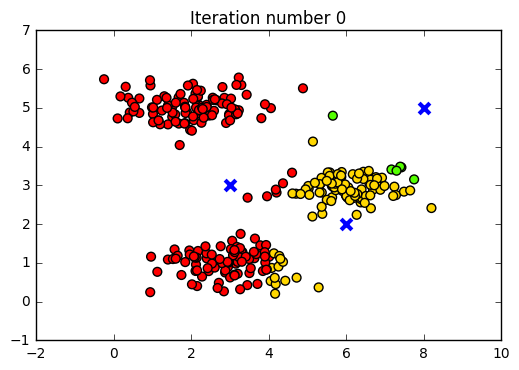

Press enter to continue.


K-Means iteration 1/10...


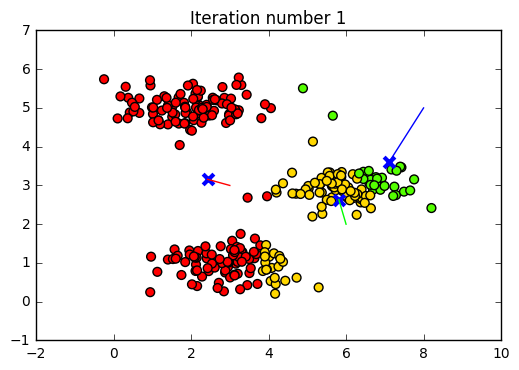

Press enter to continue.


K-Means iteration 2/10...


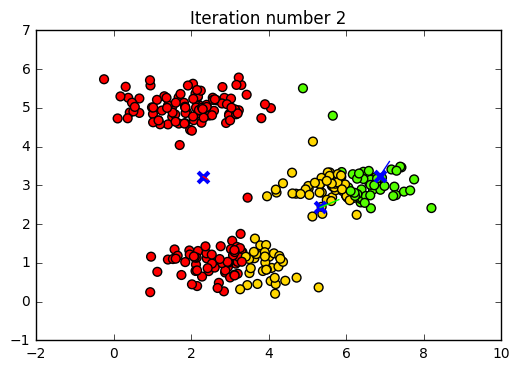

Press enter to continue.


K-Means iteration 3/10...


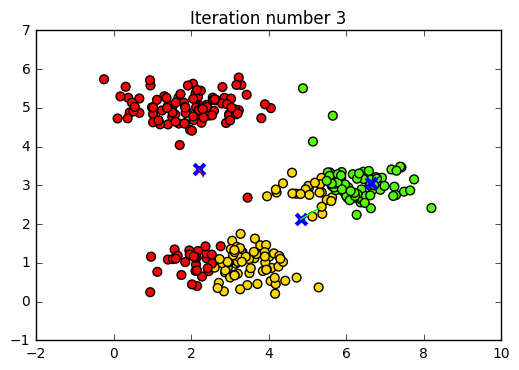

Press enter to continue.


K-Means iteration 4/10...


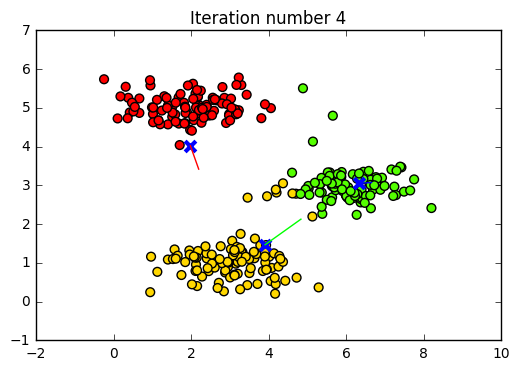

Press enter to continue.


K-Means iteration 5/10...


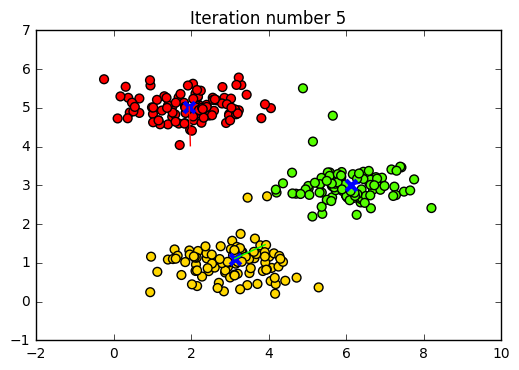

Press enter to continue.


K-Means iteration 6/10...


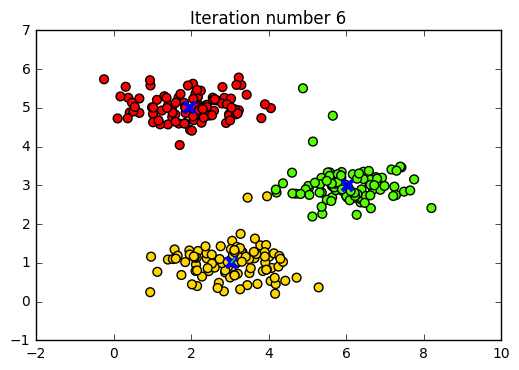

Press enter to continue.


K-Means iteration 7/10...


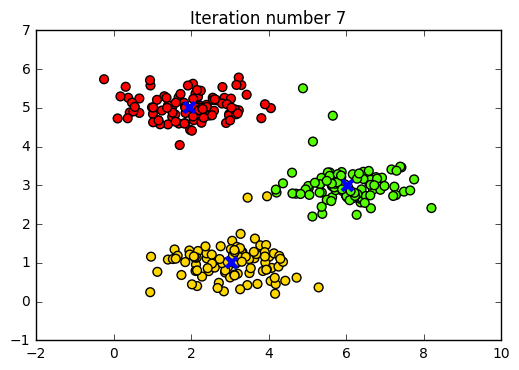

Press enter to continue.


K-Means iteration 8/10...


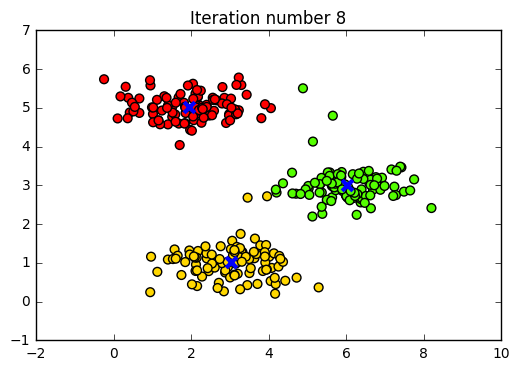

Press enter to continue.


K-Means iteration 9/10...


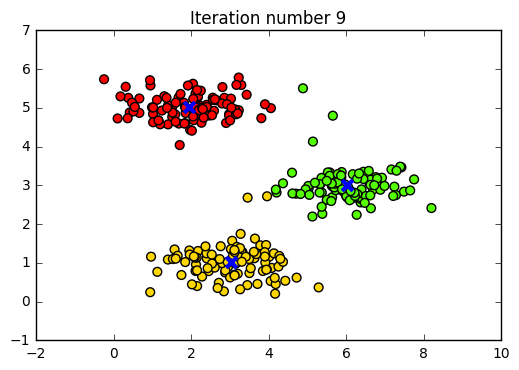

Press enter to continue.



K-Means Done.




In [4]:
print('\nRunning K-Means clustering on example dataset.\n\n')

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means

centroids, idx = run_kmeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n\n')

## Part 4: K-Means Clustering on Pixels 
Now we will use K-Means to compress an image. To do this,
 we will first run K-Means on the colors of the pixels in the image and
 then we will map each pixel onto its closest centroid.

In [5]:
print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
A = mpimg.imread(path_to_modules + 'bird_small.png')

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255  # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
m, n, z = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(m * n, 3)

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 5
max_iters = 5

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.py before proceeding
initial_centroids = kmeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kmeans(X, initial_centroids, max_iters)


Running K-Means clustering on pixels from an image.


K-Means iteration 0/5...
K-Means iteration 1/5...
K-Means iteration 2/5...
K-Means iteration 3/5...
K-Means iteration 4/5...


## Part 5: Image Compression
  Use the clusters of K-Means to
  compress an image. To do this, we first find the closest clusters for
  each example. After that, we K-means to compress the image


Applying K-Means to compress an image.




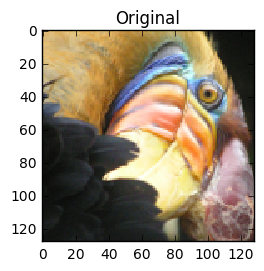

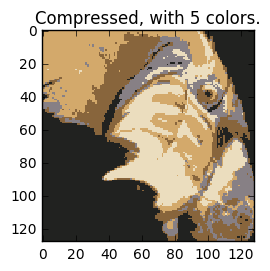

In [6]:
print('\nApplying K-Means to compress an image.\n\n')

# Find closest cluster members
idx = find_closest_centroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx.astype(int), :]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(m * n, 3)

# Display the original image
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(A * 255, interpolation='nearest')
plt.title('Original')
plt.draw()
plt.show(block=False)

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow((X_recovered * 255).reshape(A.shape), interpolation='nearest')
plt.title('Compressed, with {} colors.'.format(K))
plt.draw()
plt.show(block=False)